In [36]:
# add files that we need!
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [37]:
from src.model.logistic_regression_models import MeanFieldMultiDimensionalLogisticRegression
import torch

In [38]:
prior_mean = torch.tensor([1, 1], dtype=torch.float64)
prior_var = torch.log(torch.tensor([1, 0.5], dtype=torch.float64))

hyperparameters = {
    "prior_mu": prior_mean,
    "prior_log_var": prior_var,
    "N_samples": 50,
    "N_steps": 2000,
    "learning_rate": 0.01
}

logRegressionModel = MeanFieldMultiDimensionalLogisticRegression(None, hyperparameters, 2)

In [39]:
data_x = torch.tensor([[2, 2], [1, 1], [0, 1], [1, 0], [-0.5, 0.1], 
                       [-1, -1], [-2, -2], [0, -1], [-1, 0],
                       [0.5, 0.1]], dtype=torch.float64)
data_y = torch.tensor([1, 1, 1, 1, 1, -1, -1, -1, -1, -1], dtype=torch.float64)
data = {
    "X": data_x,
    "y": data_y,
}

t = {
    'w_mu': torch.tensor([0, 0], dtype=torch.float64),
    'w_log_var': torch.tensor([0, 0], dtype=torch.float64)
}

init_params = {
    "w_mu": prior_mean,
    "w_log_var": torch.tensor([1, 1], dtype=torch.float64),
}

In [40]:
# note that these 
print(list(logRegressionModel.parameters()))

[Parameter containing:
tensor([-0.0210, -0.0165], dtype=torch.float64, requires_grad=True), Parameter containing:
tensor([-0.0689,  0.0275], dtype=torch.float64, requires_grad=True)]


In [41]:
opt_params = logRegressionModel.fit(data, t, None, hyperparameters)

In [42]:
# plotting
%matplotlib inline

In [43]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

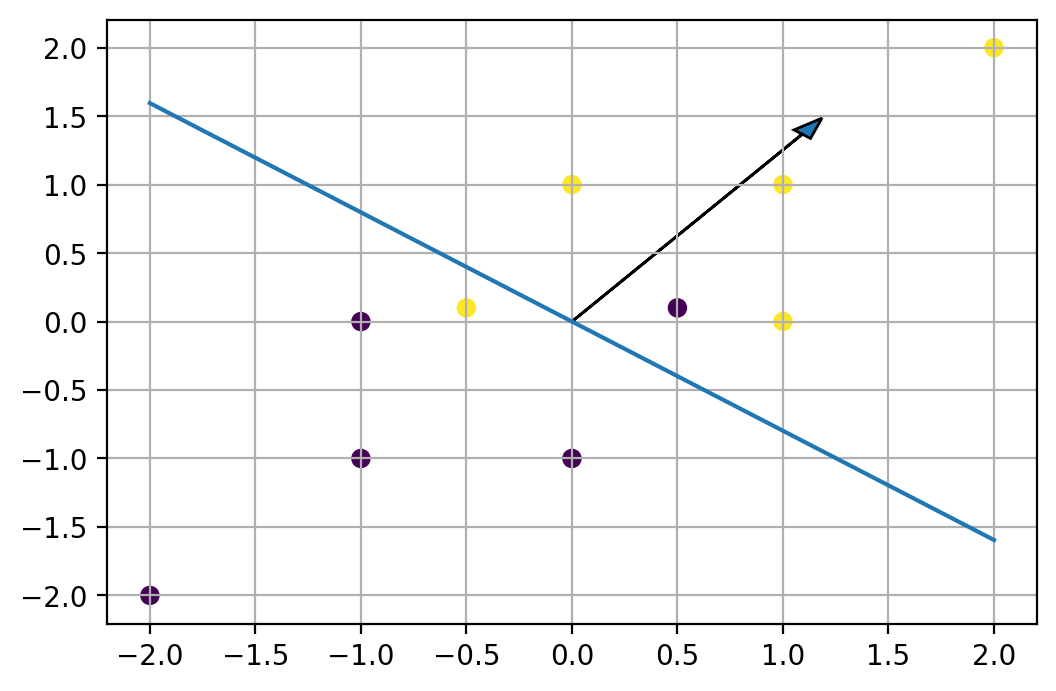

In [44]:
data_x_np = data_x.numpy()
data_y_np = data_y.numpy()

x_vals = data_x_np[:, 0]
y_vals = data_x_np[:, 1]
labels = data_y_np
plt.figure()
plt.grid(b=True)
plt.scatter(x_vals, y_vals, c = labels)

w_map = opt_params['w_mu'].detach().numpy()
plt.arrow(0, 0, w_map[0], w_map[1], head_width=0.1)
plt.plot([-2, 2], [(w_map[0]/w_map[1])*2, (w_map[0]/w_map[1])*-2])
plt.show()